# AIFo week 5, Exercises: Linear Regression, Sampling synthetic data, Effect of sample size

The goal of this week's exercise session is to apply linear regression in Python. You will generate your own data using known parameters, and use linear regression to recover the generative parameters. 

To make the task more interesting, we add random "noise" to the generated data. 
We  use numpy's (pseudo-) random number generator to generate samples 

You explore the relationship between noisy data, sample-size, and quality of the fitted model.


### How this exercise is designed:
We generate random data using a linear model with known parameters a and b, and add some random (gaussian) noise $\epsilon$:  
$y_i = a \cdot x_i + b + \epsilon_i$  

The goal is to recover the parameters a and b of the linear model from data. 

- first, you learn a method to generate sample data using rng and lambda functions  
- then you use sklearn to **fit** a linear model. If there was no noise $\epsilon$, then we would recover the parameters a and b. But in the presence of noise, we will observe some variability.  
- finally we make a systematic experiment to learn two factors that influence the precision of our estimates of a and b:  
  - The more datapoints we have (larger sample-size N), the more precise is our estimate of a and b  
  - The less noise the data has, the more precise is our estimate of a and b.
 
**Important**: In  a real application, we are given the data $(x_i, y_i)$ only. We then have to choose a model family (for example the family of linear functions $y= a \cdot x + b$ ). Using the data, we estimate those values $(a, b)$ that minimize some loss (the MSE in our case). Typically, choosing a model family and estimating the quality of the fit is not a trivial task (we cover model selection and cross-validadation later in the semester).  
In this exercise however, we **know** the model family (linear), the parameters (a, b), the noise-level of the data, and we can generate as many (or few) data points as we wish. Having full control over these hyperparameters allows us to vary some parameters and to oberserve how well our estimates of $\hat{a}$ and $\hat{b}$ approximate the true values (a, b) that were used to generate the data. 
In the last exercise, you should realize that in a real project, you perform only one (random) experiment, and that the results you obtain may have large uncertainty.

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sb

import numpy as np
from numpy.random import default_rng
# create random number generator. We reuse this instance later
rng = default_rng()

## Exercise: Lambda Functions
We want to implement a simple linear function and use it to generate data. We could do this using normal python functions (with def ...). As our function is very simple, we can use a lambda expression.

1. Read: https://www.w3schools.com/python/python_lambda.asp
2. Look at the following definition. Make sure you understand the function and the examples.

In [2]:
# define a linear function. Note that it automatically adds random noise
lin_function = lambda X, a, b, s=1 : a*X + b + rng.normal(loc=0.0, scale=s, size=X.shape)

# example call. Pass a single value x=5. Note that we cannot directly pass the scalar value but we create an array with a single value
y_1 = lin_function(np.array(5), 1, 2, s=0)
print(y_1)

# example call: To add noise, we set standard-deviation to 0.1
y_2 = lin_function(np.array(5), 1, 2, s=0.1)
print(y_2)

# example call: Pass multiple x values in an array.
y_3 = lin_function(np.array([5, 100]), 1, 2, s=1)
print(y_3)

7.0
7.118548586937018
[  6.13652593 101.42442372]


In [3]:
# define the data set. (the same x values as used in class)
data_X = np.array([-4,   -2,   1,  2.5,  3.9])

# generate data using the linear model
slope=-1
intercept = 20
Y_gen = lin_function(data_X, slope, intercept)

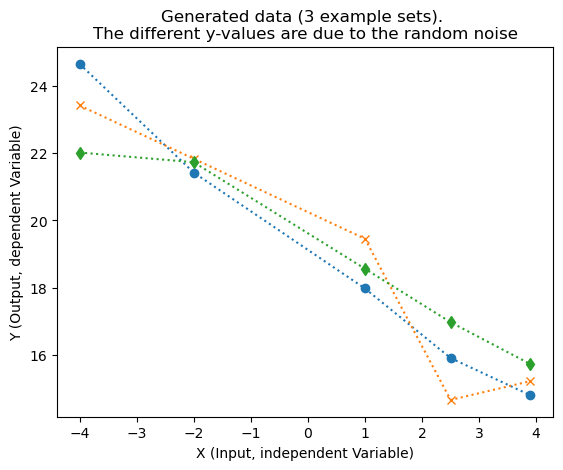

In [5]:
# Example: Visualize the generated data.
plt.plot(data_X, Y_gen, ':o')
# generate two more random data sets. 
plt.plot(data_X, lin_function(data_X, slope, intercept), ':x')
plt.plot(data_X, lin_function(data_X, slope, intercept), ':d')
plt.xlabel('X (Input, independent Variable)')
plt.ylabel('Y (Output, dependent Variable)')
plt.title('Generated data (3 example sets). \nThe different y-values are due to the random noise')
plt.show()

## Exercise: Generate random data 
Follow the examples/exercises above, and the information given during the lecture, to implement the following tasks:
1. Generate 100 uniformly distributed samples in [-50, +50]. Store them in the variable data_X .  
https://numpy.org/doc/stable/reference/generated/numpy.linspace.html 
2. Generate noisy Y using the anonymous function lin_model(). Define slope=+0.4, intercept = -7. Do not change the noise-level (standard deviation).
3. Visualize the data in a scatter plot.

In [5]:
# Your code

## Exercise: Fit a linear model to the noisy data
1. Use the LinearRegression class from scikit-learn to fit a two-parameter linear model to your data.  
  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
2. Print the parameters slope and intercept 
3. Compare with your input values. How close do they match the "true" values?
4. Calculate the residuals and visualize them in a histogram or a boxplot.
5. Discuss your observation

In [6]:
# your code

## Exercise: The importance of the sample size.
In this exercise you study how the reliability of the fit depends on the sample size and on the noise in the data. 

Automatize the previous exercise such that you can perform the following analysis:
 1. Repeat a 100 times:  
   1.1 Generate 15 uniformly distributed samples in X=[-50, 50].  
   1.2 Generate a noisy Y_gen  
   1.3 Fit a linear model to to the 15 data points.   
   1.4 Store slope and intercept. (Hint: create a 100x2 numpy-array before starting the repetition. At each iteration write the (slope,intercept) values at the i-th row)
   1.5 Calculate and store the mean and standard-deviation of the residuals
 2. Visualize (summarize) the 100 slopes and intercepts in a histogram or a boxplot. 
 3. Visualize the joint distribution of the 100 ($slope_i, intercept_i)$-points in a scatter plot. Use seaborns jointplot. Look at the examples!  https://seaborn.pydata.org/generated/seaborn.jointplot.html)
 4. Visualize the 100 mean and standard-deviations of the residuals.
 5. Repeat the same exercise, but this time, generate 500 uniformly distributed samples.
 6. Repeat the same exercise, but this time, generate 500 uniformly distributed samples AND set the noise-level (standard-deviation) = 20.
 7. Discuss your results
 8. Optional: You have results (100 slope,intercept pairs) from three different experiments. Try to visualize them in a single jointplot using a different color for each of the three experiments.

In [7]:
# Your code